In [1]:
#¿Cuantos medidas se tomaron: N=?
N=6
#GRAFICAS PARA COMPARAR PICOS (UV-VIS; RAMAN)
import numpy as np
import os
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
import csv
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
from decimal import Decimal
import scipy
from scipy.interpolate import interp1d

from math import log10, floor
%matplotlib inline

No handles with labels found to put in legend.


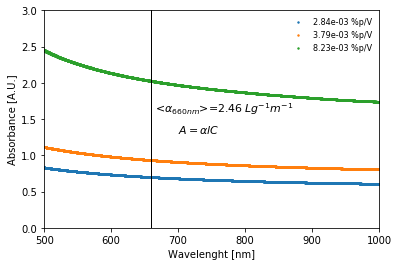

In [88]:
#redondear cifras significativas 
#def round_sig(x, sig=3): 
#   return round(x, sig-int(floor(log10(abs(x))))-1)

#Creamos el multiarray con los vectores X y Y de cada csv lambdas y abs
MultiArray=[]
MultiArrayLabels=[]# creamos multiarrays de labels filtrados - creados
MultiArrayPeaks=[] # creamos multiarrays de los picos de las gráficas
#Leemos los nombres
labels=np.genfromtxt('LABELS.txt',delimiter=';', dtype = str)
nombres=[row[1] for row in labels]
nombresfilt=[]

#Creamos la grafica del raw data, con la linea base y ya sin la linea base.
pyplot.ion()
fig=pyplot.figure()
pyplot.subplots_adjust(hspace=0.8)


ax1=fig.add_subplot(1,1,1)
ax1.set_ylabel('Absorbance [A.U.]')
ax1.set_xlabel('Wavelenght [nm]')
#ax1.set_title('Test B')
ax1.set_xlim([500,1000])
ax1.set_ylim([0,3])
ax1.legend(loc='upper left',prop={'size': 7.8})
ax1.text(665,1.6,r"<$\alpha_{660nm}$>=$2.46\:Lg^{-1}m^{-1}$", {'fontsize': 11}, family="sans-serif")
ax1.text(700,1.3,r"$A=\alpha lC$", {'fontsize': 11}, family="sans-serif")
#ax1.set_title('RawData',fontsize=10)


#INICIA LA LECTURA DE TODOS LOS ARCHIVOS
i=0
for i in range(N):
    if os.path.isfile(str(i)+'B'+'.csv')== False:
        i=i+1 # secuencia para que el programa continue aunque no encuetre un archivo con ese nombre
    else:
        data=np.genfromtxt(str(i)+'B'+'.csv',delimiter=';', dtype = str)
        nombresfilt.append(nombres[i])
    
        a=[float(row[0]) for row in data]
        b=[float(row[1]) for row in data]
        
        a = np.asarray(a)
        b = np.asarray(b)
        
        absor=[]
        for j in range (len(a)):
            if a[j]==660:
                #print(b[j])
                #Ley de Beer-Lambert con un coeficiente de extinción de <α_660nm>=2,46 L〖 g〗^(-1) mm^(-1) y una cubeta de 10mm
                porcen_pV=4.06*10**-3*b[j]
                absor.append(b[j])
            
        #print(nombres[i])
        etiqueta= str("%.2e" % Decimal(porcen_pV))+str(" %p/V")
        ax1.scatter(a, b,s=2, label=etiqueta)
        ax1.axvline(x=660, ymin=0, ymax = 3, linewidth=1, color='k')
        fig.canvas.draw()
        ax1.legend(prop={'size': 8}, frameon=False)
        
        
            
    fig.savefig('uv_vis.eps',dpi=199)